##Задача 9.2

optimal [[ 574.09678943]
 [   2.43493002]]
suboptimal [[ 573.24234256]
 [   2.46341158]]


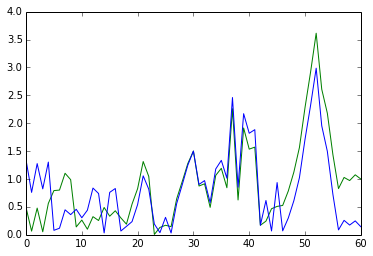

In [23]:
# encoding: utf-8
%matplotlib inline

from math import log, exp, sqrt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from scipy.stats import norm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

def load_data():
    return [float(x) for x in open('data.txt')]

def linear_regression(Q, F):
    I = inv(np.dot(np.transpose(Q), Q))
    return np.dot(np.dot(I, np.transpose(Q)), F)

def calc_optimal(data):
    N = len(data)
    a = np.sum([1.0 / (i + 1) for i in range(N)])
    b = np.sum([float(i) / (i + 1) for i in range(N)])
    c = np.sum([float(i * i) / (i + 1) for i in range(N)])
    f1 = np.sum([float(x) / (i + 1) for i, x in zip(range(N), data)])
    f2 = np.sum([float(x) * i / (i + 1) for i, x in zip(range(N), data)])
    return linear_regression([[a, b], [b, c]], [[f1], [f2]])

def calc_suboptimal(data):
    N = len(data)
    a = N
    b = np.sum([float(i) for i in range(N)])
    c = np.sum([float(i * i) for i in range(N)])
    f1 = np.sum([float(x) for i, x in zip(range(N), data)])
    f2 = np.sum([float(x) * i for i, x in zip(range(N), data)])
    return linear_regression([[a, b], [b, c]], [[f1], [f2]])


data = load_data()
optimal = calc_optimal(data)
sub_opt = calc_suboptimal(data)
print 'optimal', optimal
print 'suboptimal', sub_opt

#plt.plot(range(N), data, 'ro')
#plt.plot(range(N), , color='b')
#plt.plot(range(N), sub_opt[0] + np.array(range(N)) * sub_opt[1], color='g')

optimal_diff = np.absolute(
    optimal[0] + np.array(range(N)) * optimal[1] - data)
sub_opt_diff = np.absolute(
    sub_opt[0] + np.array(range(N)) * sub_opt[1] - data)

plt.plot(range(N), optimal_diff, color='g')
plt.plot(range(N), sub_opt_diff, color='b')
plt.show()

In [21]:
sigma_2 = np.sum(
    [x / (i + 1) for i, x in zip(range(N), np.square(optimal_diff))]) / N
sigma_t_2 = sigma_2 / (optimal[1] ** 2)

print sigma_2, sigma_t_2

0.0442748949416 [ 0.00746766]


In [26]:
f = open('output.txt', 'w')
f.write('%f %f %f %f\n' % (optimal[0], optimal[1], sqrt(sigma_2), sigma_t_2))
f.close()